In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import librosa
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from matplotlib import style
import pandas
import seaborn as sns
import csv
from sklearn import svm
import itertools
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
from scipy.special import comb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectPercentile, GenericUnivariateSelect
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from scipy.stats import rankdata

In [7]:
DATADIR = ""
CATEGORIES = ["DATASET1/Segmented_Laugh", "DATASET1/Segmented_NonLaugh1"]

# Defining Functions

In [8]:
def createcombinations(n):
    elements = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
    a = list(itertools.combinations(elements, n))
    a = np.asarray(a).astype(int)
    return a

In [12]:
def create_training_data(t_frame, t_shift, n_mfccs, component, training_data, n_features):
    count=0
    error_count = 0
    laugh_counter = 0
    nonlaugh_counter = 0
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num = CATEGORIES.index(category)
        for aud in os.listdir(path):
            if aud == '.DS_Store':
                continue
            
            aud_array , sr = librosa.load(os.path.join(path,aud), sr=None)
            count+=1

            mfccs = []
            
            try:
                mfcc = (librosa.feature.mfcc(aud_array, sr=sr,  n_mfcc=20,  win_length = int(sr*t_frame), hop_length = int(sr*t_shift))) 
                
                mfcc_temp = mfcc[component,:]
                #mean_mfccs = np.mean(np.asarray(mfcc_temp),axis = 1)
                std_mfccs = np.std(np.asarray(mfcc_temp), axis = 1)
                var_mfccs = np.var(np.asarray(mfcc_temp), axis = 1)
                
                mfcc_delta = librosa.feature.delta(mfcc_temp)
                #mfcc_delta_mean = np.mean(np.asarray(mfcc_delta),axis = 1)
                mfcc_delta_var = np.var(np.asarray(mfcc_delta),axis = 1)
                mfcc_delta_std = np.std(np.asarray(mfcc_delta),axis = 1)
                
                mfcc_delta2 = librosa.feature.delta(mfcc_delta)
                #mfcc_delta2_mean = np.mean(np.asarray(mfcc_delta2),axis = 1)
                mfcc_delta2_var = np.var(np.asarray(mfcc_delta2),axis = 1)
                mfcc_delta2_std = np.std(np.asarray(mfcc_delta2),axis = 1)
                
                
                #mfccs.append(mean_mfccs)
                mfccs.append(std_mfccs)
                mfccs.append(var_mfccs)
                #mfccs.append(mfcc_delta_mean)
                mfccs.append(mfcc_delta_std)
                mfccs.append(mfcc_delta_var)
                mfccs.append(mfcc_delta2_std)
                mfccs.append(mfcc_delta2_var)
                
                mfccs = np.asarray(mfccs).reshape(n_mfccs*n_features,1)
                
                training_data.append([mfccs.reshape(-1,1), class_num])
                if category == 'DATASET1/Segmented_Laugh':
                    laugh_counter +=1
                else:
                    nonlaugh_counter += 1
                    if nonlaugh_counter >= laugh_counter:
                        break

            except ValueError:
                pass
            
    return laugh_counter, nonlaugh_counter
    

# Main Loop

In [13]:
def scaling(X,n_mfcc):
    for i in range(n_mfcc):
        X[:,i] = X[:,i]/(np.mean(X[:,i]))
        

    #X[:,1] = np.square(X[:,1])
        
    return X

In [14]:
n_features = 6
t_frame = 0.025
t_shift = 0.01
n_mfcc = 20
component = createcombinations(n_mfcc)

for components in component:
    training_data = []
    laugh, nonlaugh = create_training_data(t_frame, t_shift, n_mfcc, components, training_data, n_features)
    print(laugh, nonlaugh)
    
random.shuffle(training_data) 
X = []
Y = []
for features, label in training_data:
    X.append(features)
    Y.append(label)
        
X = np.array(X).reshape(-1,n_mfcc*n_features)
Y = np.array(Y)
X = scaling(X,n_mfcc)

779 779


In [7]:
 ##Using SFS ( is forward = True ) and SBS ( if forward = False)

In [8]:

classifier = svm.SVC(kernel='linear')
sfs1 = SFS(classifier, 
           k_features=10, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy'
           )

sfs1 = sfs1.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 32.2min finished

[2020-01-03 01:33:14] Features: 19/10 -- score: 0.7503711392032776[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 23.4min finished

[2020-01-03 01:56:41] Features: 18/10 -- score: 0.7509261808313997[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 22.7min finished

[2020-01-03 02:19:24] Features: 17/10 -- score: 0.7509260098389079[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [9]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

In [10]:
df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7421441774491682, 0.7523105360443623, 0.735...",0.746858,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0125675,0.00977795,0.00488898
19,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.7458410351201479, 0.7541589648798521, 0.743...",0.750371,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...",0.0100877,0.00784857,0.00392429
18,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.7458410351201479, 0.755083179297597, 0.7430...",0.750926,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...",0.0116516,0.00906536,0.00453268
17,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 1...","[0.7504621072088724, 0.7523105360443623, 0.742...",0.750926,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 1...",0.0108546,0.00844522,0.00422261
16,"(0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...","[0.7513863216266173, 0.7541589648798521, 0.741...",0.751481,"(0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...",0.0116296,0.00904826,0.00452413
15,"(0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...","[0.7504621072088724, 0.755083179297597, 0.7384...",0.750556,"(0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...",0.0123817,0.00963337,0.00481668
14,"(0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 19)","[0.7504621072088724, 0.7486136783733827, 0.737...",0.748892,"(0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 19)",0.0119061,0.00926332,0.00463166
13,"(0, 1, 2, 4, 5, 6, 10, 11, 12, 13, 14, 15, 19)","[0.7504621072088724, 0.7513863216266173, 0.740...",0.750186,"(0, 1, 2, 4, 5, 6, 10, 11, 12, 13, 14, 15, 19)",0.0103375,0.00804293,0.00402146
12,"(0, 1, 2, 4, 5, 6, 10, 11, 12, 13, 14, 19)","[0.744916820702403, 0.7495378927911276, 0.7375...",0.748338,"(0, 1, 2, 4, 5, 6, 10, 11, 12, 13, 14, 19)",0.0123488,0.00960779,0.00480389
11,"(0, 1, 2, 4, 5, 6, 10, 11, 12, 14, 19)","[0.7402957486136784, 0.7532347504621072, 0.743...",0.748522,"(0, 1, 2, 4, 5, 6, 10, 11, 12, 14, 19)",0.0104575,0.00813627,0.00406814


In [22]:
df.to_csv('/Users/yash_/Documents/project/file1.csv')

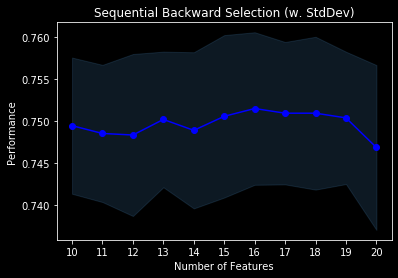

In [21]:
style.use('dark_background')
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
#plt.grid()
plt.show()


In [23]:
##########################################################################################################

In [ ]:
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(np.abs(X), Y)
np.set_printoptions(precision=3)
fclass = fit.scores_

test = SelectKBest(score_func=mutual_info_classif, k=5)
fit = test.fit(np.abs(X), Y)
np.set_printoptions(precision=3)
mutual = fit.scores_

In [82]:
row_list = [["MFCCs", 'f_classif Score', 'Mutual Info Classif Score']]
for i in range(20):
    row_list.append([str(i) + ' delta2', np.int(fclass[i]), np.float(mutual[i])])
    
with open('MFCC_Delta2_' + str(n_mfcc) + '.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)



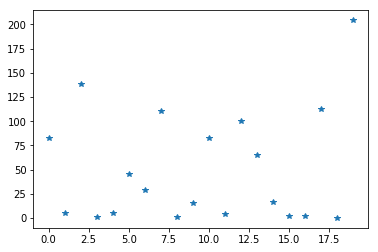

In [27]:
plt.plot(fit.scores_,'*')

In [47]:
rankdata(fit.scores_)

array([15.,  7., 19.,  2.,  8., 12., 11., 17.,  3.,  9., 14.,  6., 16.,
       13., 10.,  4.,  5., 18.,  1., 20.])

In [38]:
mean = []
meanlaugh = []
meannon = []
std = []
for i in range(20):
    mean.append(np.mean(X[:,i]))
    meanlaugh.append(np.mean(X[np.where(Y==0),i]))
    meannon.append(np.mean(X[np.where(Y==1),i]))
    std.append(np.std(X[:,i]))
    print('i = ', i, 'Mean = ', mean[i], 'Laugh =', meanlaugh[i], 'Non=', meannon[i])

i =  0 Mean =  1.0 Laugh = 0.7667979 Non= 1.2332021
i =  1 Mean =  1.0 Laugh = 0.9465965 Non= 1.0534035
i =  2 Mean =  1.0 Laugh = 1.9465332 Non= 0.053466786
i =  3 Mean =  1.0 Laugh = 0.97723967 Non= 1.0227603
i =  4 Mean =  0.99999994 Laugh = 1.0277878 Non= 0.97221184
i =  5 Mean =  0.99999994 Laugh = 0.6255315 Non= 1.3744684
i =  6 Mean =  1.0 Laugh = 1.1456468 Non= 0.85435325
i =  7 Mean =  1.0 Laugh = -2.5136871 Non= 4.513687
i =  8 Mean =  1.0000001 Laugh = 1.0591564 Non= 0.9408437
i =  9 Mean =  0.99999994 Laugh = 1.0885608 Non= 0.9114388
i =  10 Mean =  1.0000001 Laugh = 1.7061445 Non= 0.2938556
i =  11 Mean =  1.0 Laugh = 0.704957 Non= 1.2950432
i =  12 Mean =  0.9999998 Laugh = 0.78099 Non= 1.21901
i =  13 Mean =  1.0 Laugh = 1.9171126 Non= 0.082887605
i =  14 Mean =  1.0000001 Laugh = 1.0836585 Non= 0.91634166
i =  15 Mean =  1.0 Laugh = 0.2442542 Non= 1.7557458
i =  16 Mean =  1.0 Laugh = 0.9427881 Non= 1.057212
i =  17 Mean =  1.0 Laugh = 2.3919232 Non= -0.3919231
i =  18 

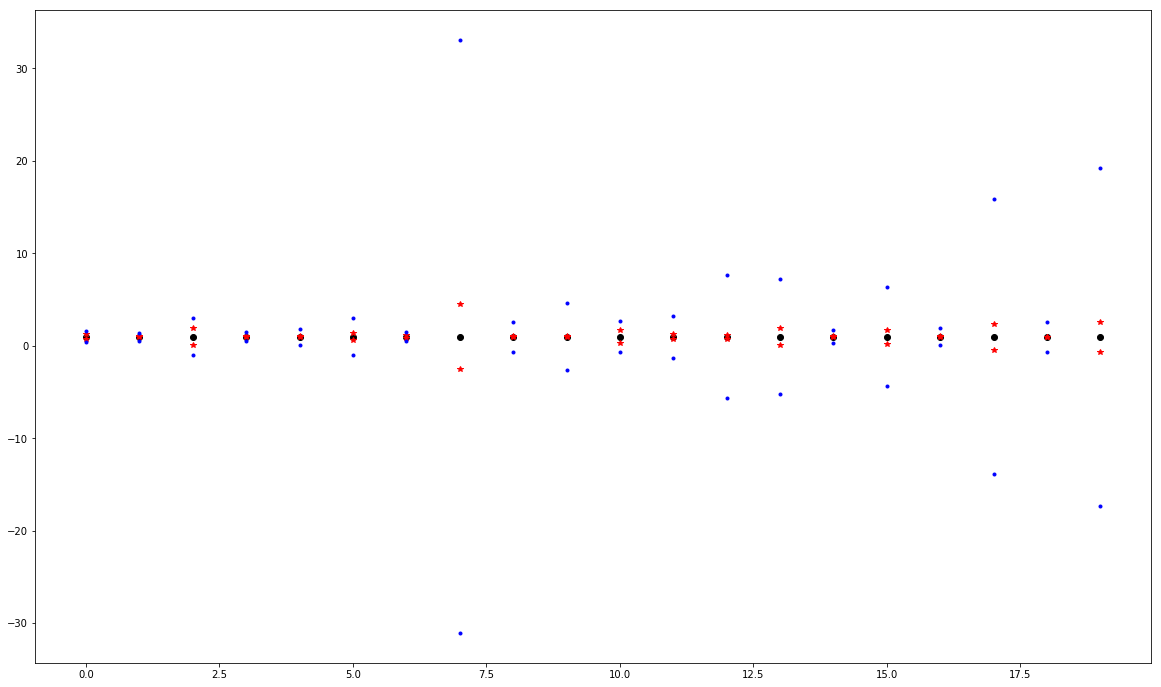

In [26]:
plt.figure(figsize=(20, 12))
plt.plot(mean,'ko')
plt.plot(meanlaugh,'r*')
plt.plot(meannon,'r*')
plt.plot(np.array(mean)+np.array(std),'b.')
plt.plot(np.array(mean)-np.array(std),'b.')

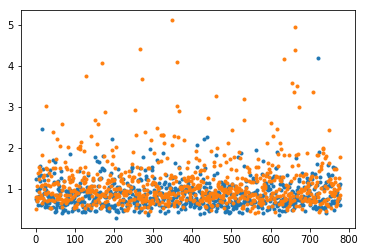

In [62]:
plt.plot((X[np.where(Y==1),14]).T,'.')
plt.plot((X[np.where(Y==0),14]).T,'.')

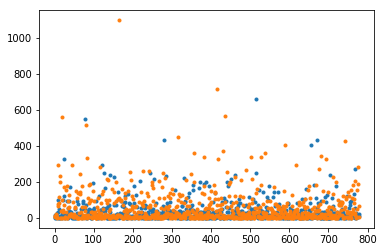

In [31]:
plt.plot(np.square(X[np.where(Y==1),12]).T,'.')
plt.plot(np.square(X[np.where(Y==0),12]).T,'.')

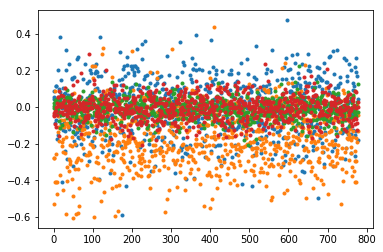

In [188]:
plt.plot(X[np.where(Y==1),2].T,'.')
plt.plot(X[np.where(Y==0),2].T,'.')

plt.plot(X[np.where(Y==1),12].T,'.')
plt.plot(X[np.where(Y==0),12].T,'.')

In [10]:
style.use('dark-background')
plt.plot(X[np.where(Y==1),1].T,'.')
plt.plot(X[np.where(Y==0),0].T,'.')

NameError: name 'style' is not defined